In [57]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

In [58]:
import pandas as pd
import numpy as np

In [59]:
import geopandas as gpd


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [61]:
df=pd.read_csv("covid_19_clean_complete.csv")
df

,Unnamed: 0,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,0,Anhui,Mainland China,31.82570,117.2264,1/22/20,1,0,0,POINT (31.8257 117.2264)
1,1,Beijing,Mainland China,40.18240,116.4142,1/22/20,14,0,0,POINT (40.1824 116.4142)
2,2,Chongqing,Mainland China,30.05720,107.8740,1/22/20,6,0,0,POINT (30.0572 107.874)
3,3,Fujian,Mainland China,26.07890,117.9874,1/22/20,1,0,0,POINT (26.0789 117.9874)
4,4,Gansu,Mainland China,36.06110,103.8343,1/22/20,0,0,0,POINT (36.0611 103.8343)
5,5,Guangdong,Mainland China,23.34170,113.4244,1/22/20,26,0,0,POINT (23.3417 113.4244)
6,6,Guangxi,Mainland China,23.82980,108.7881,1/22/20,2,0,0,POINT (23.8298 108.7881)
7,7,Guizhou,Mainland China,26.81540,106.8748,1/22/20,1,0,0,POINT (26.8154 106.8748)
8,8,Hainan,Mainland China,19.19590,109.7453,1/22/20,4,0,0,POINT (19.1959 109.7453)
9,9,Hebei,Mainland China,38.04280,114.5149,1/22/20,1,0,0,POINT (38.0428 114.5149)


In [62]:
df.columns

Index(['Unnamed: 0', 'Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered', 'geometry'],
      dtype='object')

In [63]:
df.columns.str.replace(r'\n','',regex=True)

Index(['Unnamed: 0', 'Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered', 'geometry'],
      dtype='object')

In [64]:
df.columns=df.columns.str.replace(r'\n','',regex=True)

In [65]:
df.columns

Index(['Unnamed: 0', 'Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered', 'geometry'],
      dtype='object')

In [66]:
df.rename(columns={'Province/State':'Province_State','Country/Region':'Country_Region'},inplace=True)

In [67]:
df.columns

Index(['Unnamed: 0', 'Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered', 'geometry'],
      dtype='object')

In [68]:
df.shape

(11985, 10)

In [69]:
df.dtypes

Unnamed: 0          int64
Province_State     object
Country_Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
geometry           object
dtype: object

In [70]:
df.head(10)

,Unnamed: 0,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (31.8257 117.2264)
1,1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (40.1824 116.4142)
2,2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (30.0572 107.874)
3,3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (26.0789 117.9874)
4,4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (36.0611 103.8343)
5,5,Guangdong,Mainland China,23.3417,113.4244,1/22/20,26,0,0,POINT (23.3417 113.4244)
6,6,Guangxi,Mainland China,23.8298,108.7881,1/22/20,2,0,0,POINT (23.8298 108.7881)
7,7,Guizhou,Mainland China,26.8154,106.8748,1/22/20,1,0,0,POINT (26.8154 106.8748)
8,8,Hainan,Mainland China,19.1959,109.7453,1/22/20,4,0,0,POINT (19.1959 109.7453)
9,9,Hebei,Mainland China,38.0428,114.5149,1/22/20,1,0,0,POINT (38.0428 114.5149)


In [71]:
df.columns

Index(['Unnamed: 0', 'Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered', 'geometry'],
      dtype='object')

In [72]:
df=df[['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered']]

In [73]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,11985.000000,11985.000000,11985.000000,11985.000000,11985.000000
mean,32.779542,-13.088208,207.967543,6.212015,66.589320
std,19.169657,88.673124,3009.300063,113.570679,1179.846524
min,-41.454500,-157.858400,0.000000,0.000000,0.000000
25%,29.028000,-86.862200,0.000000,0.000000,0.000000
50%,37.601700,-7.692100,0.000000,0.000000,0.000000
75%,42.984900,57.000000,2.000000,0.000000,0.000000
max,64.963100,174.886000,67707.000000,2986.000000,45235.000000


In [74]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [75]:
df.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [76]:
df.groupby('Date')['Confirmed','Deaths','Recovered'].sum()
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [77]:
df.groupby('Date')['Confirmed','Deaths','Recovered'].max()
df.head(10)

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0
5,Guangdong,Mainland China,23.3417,113.4244,1/22/20,26,0,0
6,Guangxi,Mainland China,23.8298,108.7881,1/22/20,2,0,0
7,Guizhou,Mainland China,26.8154,106.8748,1/22/20,1,0,0
8,Hainan,Mainland China,19.1959,109.7453,1/22/20,4,0,0
9,Hebei,Mainland China,38.0428,114.5149,1/22/20,1,0,0


In [78]:
df_per_day=df.groupby('Date')['Confirmed','Deaths','Recovered'].max()

In [79]:
df_per_day.head()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42


In [80]:
df_per_day['Confirmed'].max()

67707

In [81]:
df_per_day['Confirmed'].min()

444

In [82]:
df_per_day['Confirmed'].idxmax()

'3/8/20'

In [83]:
df_per_day['Confirmed'].idxmin()

'1/22/20'

In [84]:
df.groupby(['Country_Region'])['Confirmed','Deaths','Recovered'].max()
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [85]:
df.groupby(['Province_State','Country_Region'])['Confirmed','Deaths','Recovered'].max()
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [86]:
df['Country_Region'].value_counts()
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


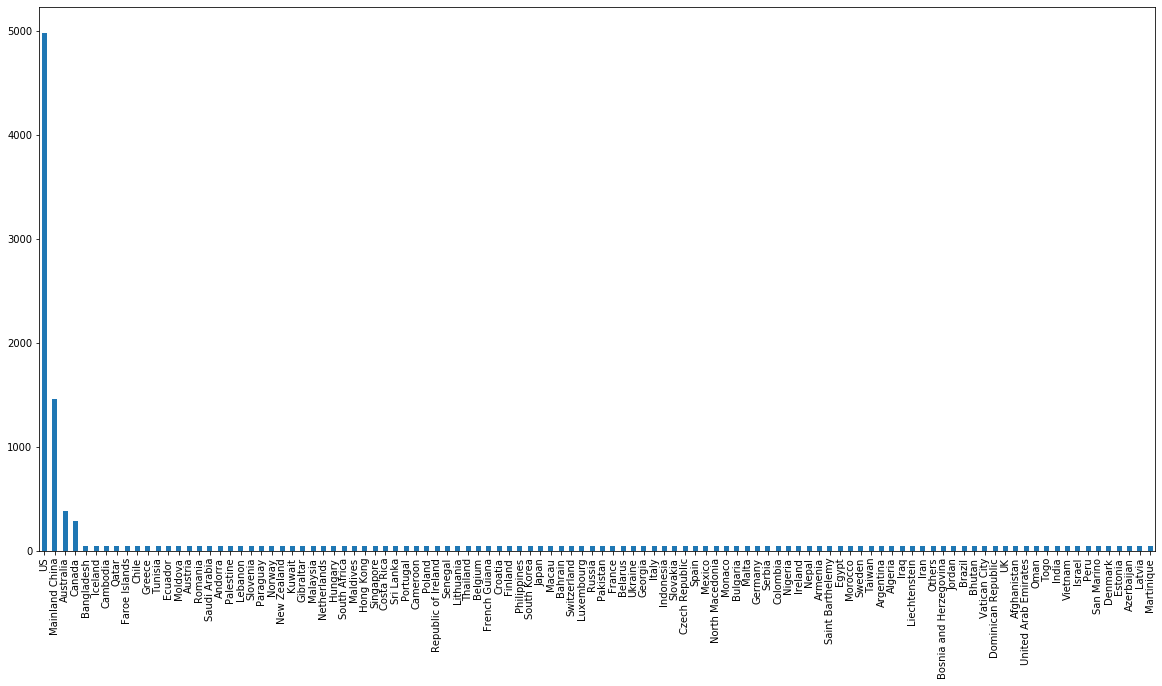

In [87]:
df['Country_Region'].value_counts().plot(kind='bar',figsize=(20,10))

In [88]:
len(df['Country_Region'].unique())


108

In [89]:
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_version',
 'array',
 'base',
 'clip',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_file',
 'read_postgis',
 'show_versions',
 'sjoin',
 'tools']

In [90]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [91]:
gdf01=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['Lat'],df['Long']))

In [92]:
gdf01.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (31.826 117.226)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (40.182 116.414)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (30.057 107.874)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (26.079 117.987)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (36.061 103.834)


In [93]:
type(gdf01)

geopandas.geodataframe.GeoDataFrame

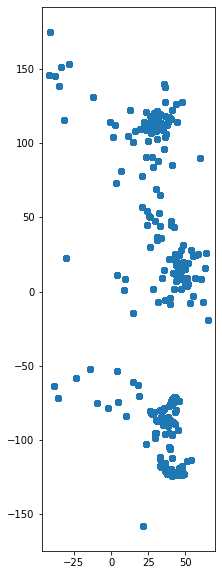

In [94]:
gdf01.plot(figsize=(20,10))

In [ ]:
world['continent'].unique()

In [120]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,cases_date
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (31.826 117.226),2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (40.182 116.414),2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (30.057 107.874),2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (26.079 117.987),2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (36.061 103.834),2020-01-22


In [121]:
df[df['Country_Region']=='Mainland China']
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,cases_date
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (31.826 117.226),2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (40.182 116.414),2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (30.057 107.874),2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (26.079 117.987),2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (36.061 103.834),2020-01-22


In [122]:
gdf01[gdf01['Country_Region']=='Mainland China']
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,cases_date
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (31.826 117.226),2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (40.182 116.414),2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (30.057 107.874),2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (26.079 117.987),2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (36.061 103.834),2020-01-22


In [123]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,cases_date
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (31.826 117.226),2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (40.182 116.414),2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (30.057 107.874),2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (26.079 117.987),2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (36.061 103.834),2020-01-22


In [124]:
df_per_day
df.head()


,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,cases_date
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (31.826 117.226),2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (40.182 116.414),2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (30.057 107.874),2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (26.079 117.987),2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (36.061 103.834),2020-01-22


In [125]:
df2=df

In [126]:
df.to_csv("covid_19_clean_complete.csv")

In [127]:
import datetime as dt

In [128]:
df['cases_date']=pd.to_datetime(df2['Date'])

In [129]:
df2.dtypes


Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
geometry                geometry
cases_date        datetime64[ns]
dtype: object

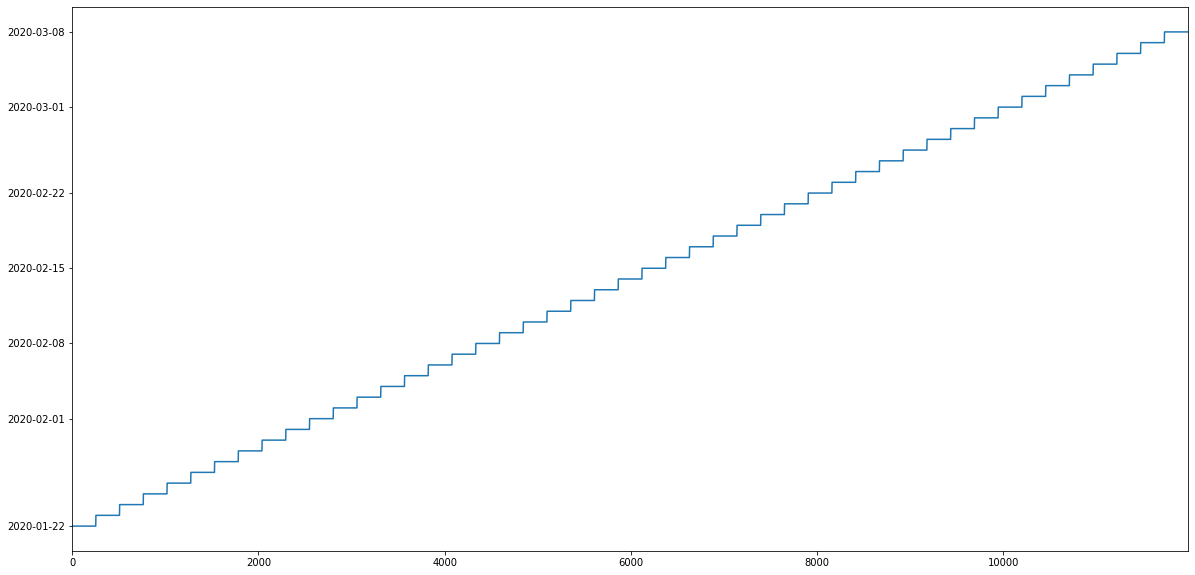

In [130]:
df['cases_date'].plot(figsize=(20,10))

In [131]:
ts=df2.set_index('cases_date')
ts
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,cases_date
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (31.826 117.226),2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (40.182 116.414),2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (30.057 107.874),2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (26.079 117.987),2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (36.061 103.834),2020-01-22


In [132]:
ts.loc['2020-01']
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,cases_date
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (31.826 117.226),2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (40.182 116.414),2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (30.057 107.874),2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (26.079 117.987),2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (36.061 103.834),2020-01-22


In [133]:
ts.loc['2020-02-24':'2020-02-25']
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,cases_date
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (31.826 117.226),2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (40.182 116.414),2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (30.057 107.874),2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (26.079 117.987),2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (36.061 103.834),2020-01-22


In [134]:
ts.loc['2020-02-24':'2020-02-25'][['Confirmed','Recovered']]
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,cases_date
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (31.826 117.226),2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (40.182 116.414),2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (30.057 107.874),2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (26.079 117.987),2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (36.061 103.834),2020-01-22


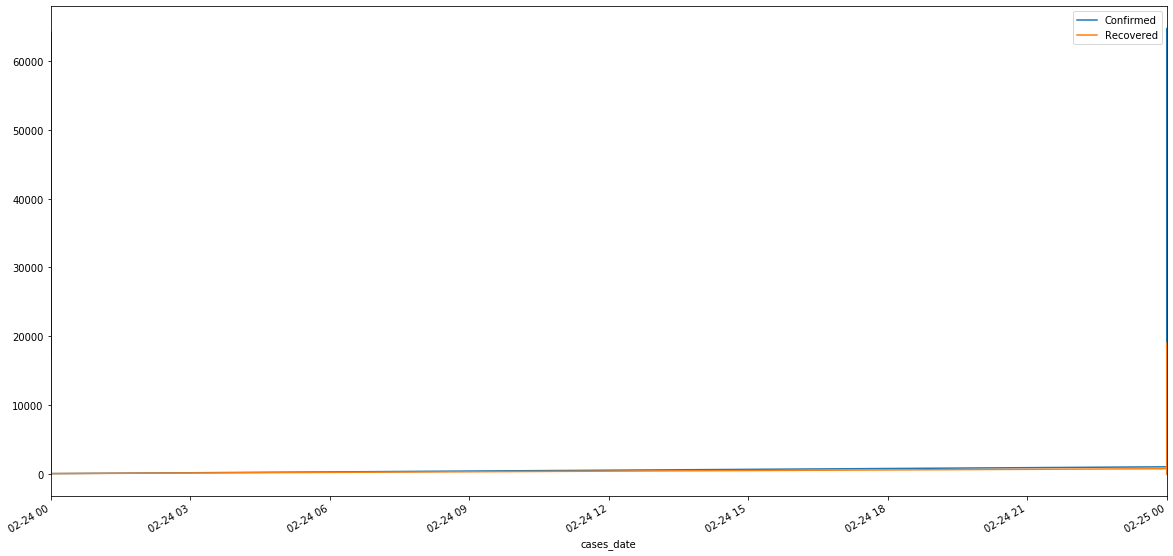

In [135]:
ts.loc['2020-02-24':'2020-02-25'][['Confirmed','Recovered']].plot(figsize=(20,10))


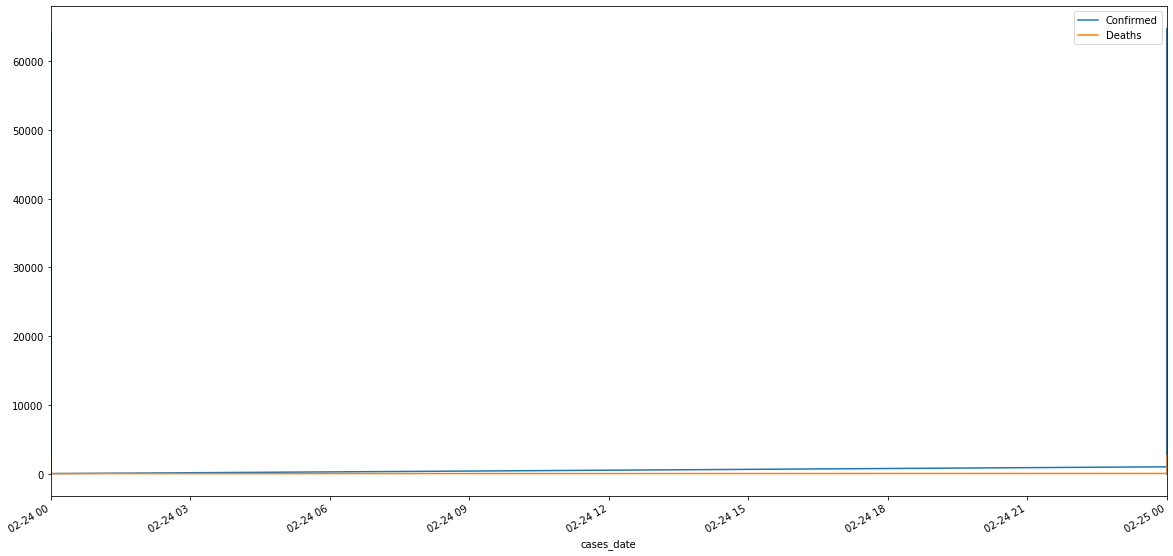

In [136]:
ts.loc['2020-02-24':'2020-02-25'][['Confirmed','Deaths']].plot(figsize=(20,10))

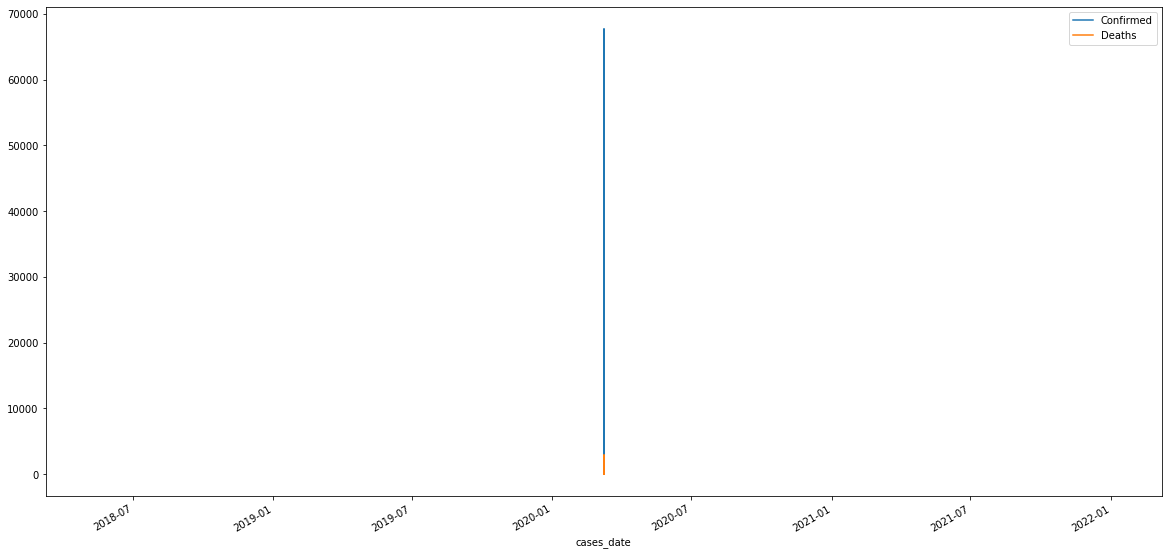

In [137]:

ts.loc['2020-03-8':'2020-03-8'][['Confirmed','Deaths']].plot(figsize=(20,10))

In [138]:
df_by_date=ts.groupby(['cases_date']).sum().reset_index(drop=None)
df_by_date
df

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry,cases_date
0,Anhui,Mainland China,31.82570,117.2264,1/22/20,1,0,0,POINT (31.826 117.226),2020-01-22
1,Beijing,Mainland China,40.18240,116.4142,1/22/20,14,0,0,POINT (40.182 116.414),2020-01-22
2,Chongqing,Mainland China,30.05720,107.8740,1/22/20,6,0,0,POINT (30.057 107.874),2020-01-22
3,Fujian,Mainland China,26.07890,117.9874,1/22/20,1,0,0,POINT (26.079 117.987),2020-01-22
4,Gansu,Mainland China,36.06110,103.8343,1/22/20,0,0,0,POINT (36.061 103.834),2020-01-22
5,Guangdong,Mainland China,23.34170,113.4244,1/22/20,26,0,0,POINT (23.342 113.424),2020-01-22
6,Guangxi,Mainland China,23.82980,108.7881,1/22/20,2,0,0,POINT (23.830 108.788),2020-01-22
7,Guizhou,Mainland China,26.81540,106.8748,1/22/20,1,0,0,POINT (26.815 106.875),2020-01-22
8,Hainan,Mainland China,19.19590,109.7453,1/22/20,4,0,0,POINT (19.196 109.745),2020-01-22
9,Hebei,Mainland China,38.04280,114.5149,1/22/20,1,0,0,POINT (38.043 114.515),2020-01-22


In [139]:
df_by_date.columns

Index(['cases_date', 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

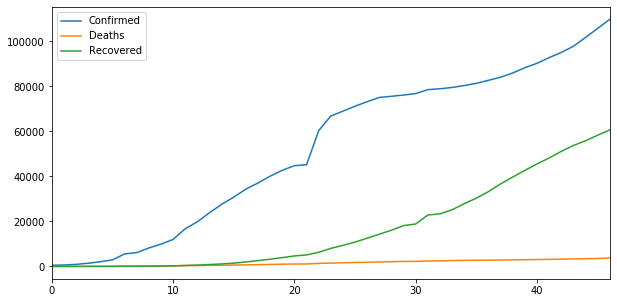

In [140]:
df_by_date[['Confirmed', 'Deaths', 'Recovered']].plot(kind='line',figsize=(10,5))
